In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine, make_classification, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_data = load_wine()

In [3]:
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
# Creating x and y variables
x = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)
y = wine_data.target

In [5]:
x.shape


(178, 13)

In [7]:
np.unique(y,return_counts = True)

(array([0, 1, 2]), array([59, 71, 48]))

In [8]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
# data standardization
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

# data sample after scaling
x_standardized = pd.DataFrame(x_standardized, columns = scaler.get_feature_names_out())
x_standardized.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [10]:
pca = PCA(n_components =2)
x_pca = pca.fit_transform(x_standardized)

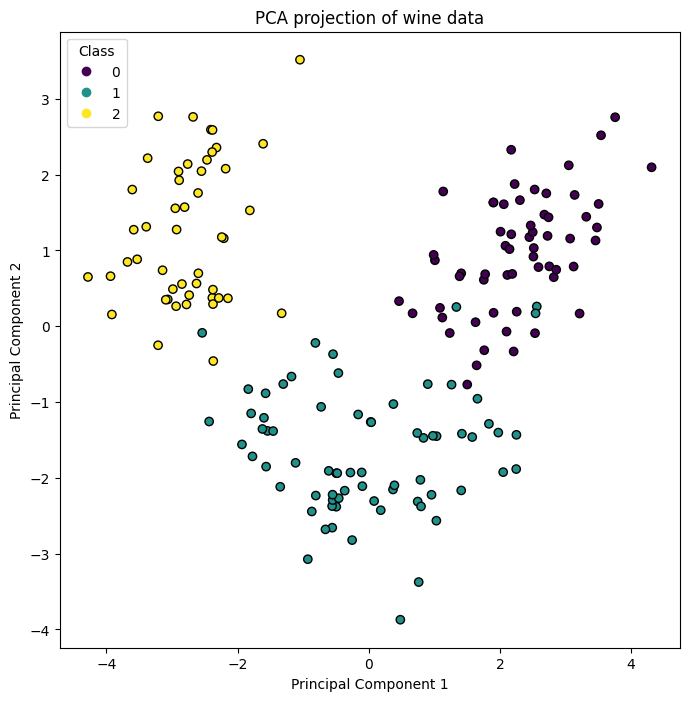

In [13]:
plt.figure(figsize =(8,8))
scatter = plt.scatter(x_pca[:,0],x_pca[:,1],c=y , cmap = 'viridis',edgecolors='k')
plt.title('PCA projection of wine data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(),title='Class')
plt.show()

In [14]:
# Explained variance
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Cumulative % of variance for 2 PC\'S: ',round(pca.explained_variance_ratio_.sum()*100,2),'%')

Explained Variance:  [0.36198848 0.1920749 ]
Cumulative % of variance for 2 PC'S:  55.41 %


## New PCA on new SYNTHETIC dataset of 200 fetures

In [15]:
# generating synthetic data with 10000 smaples and 200 columns
x_synthetic, y_synthetic = make_classification(n_samples = 10000, n_features = 200, n_informative = 50,n_redundant = 10, n_classes = 3, random_state = 42)

In [16]:
# standardize the data
syn_scaler = StandardScaler()
x_standardized_synthetic = syn_scaler.fit_transform(x_synthetic)

In [25]:
# Reducing the dimensions to 2 principal components
syn_pca = PCA(n_components = 2)
x_syn_pca = syn_pca.fit_transform(x_standardized_synthetic)
print(x_syn_pca[:,0])
print(x_syn_pca[:,1])

[ 1.19540881  1.22983919  2.82692084 ... -0.634234    0.6057283
 -3.04652857]
[-3.83560198 -1.84516944  1.97978579 ... -0.92042441 -0.81169809
 -0.57913865]


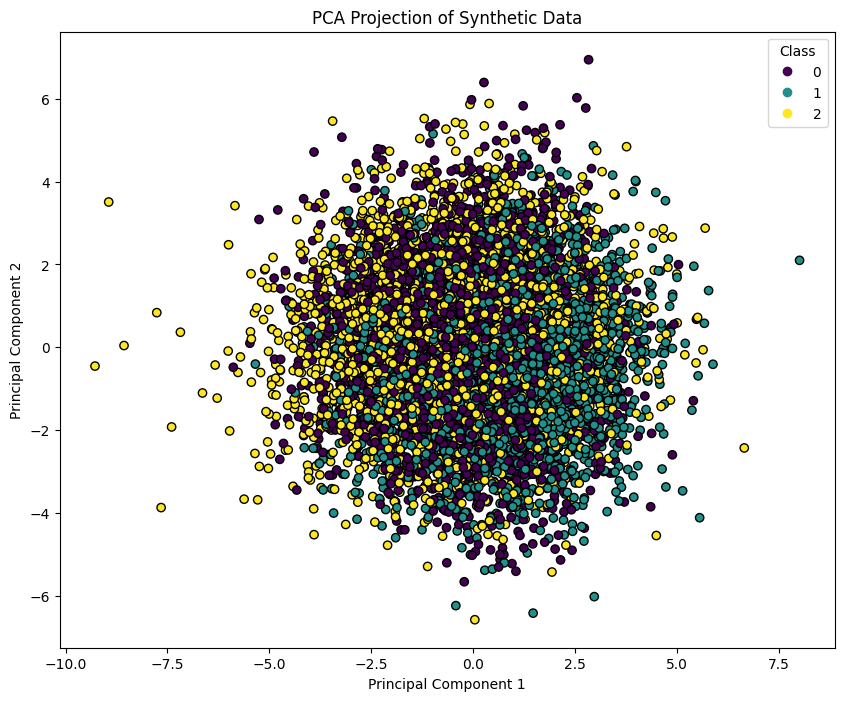

In [48]:
plt.figure(figsize = (10,8))
scatter = plt.scatter(x_syn_pca[:,0],x_syn_pca[:,1],c=y_synthetic,cmap = 'viridis',edgecolors = 'k')
plt.title('PCA Projection of Synthetic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(),title='Class')
plt.show()

In [27]:
# Explained variance
print('Explained Variance: ',syn_pca.explained_variance_ratio_)
print('Cumulative % of variance for 2 PC\'S: ',round(syn_pca.explained_variance_ratio_.sum()*100,2),'%')

Explained Variance:  [0.01623717 0.01510927]
Cumulative % of variance for 2 PC'S:  3.13 %


In [31]:
# Increasing the number of Principal components
syn_pca_multi = PCA(n_components = 20)
x_syn_pca_multi = syn_pca_multi.fit_transform(x_standardized_synthetic)

In [32]:
# Create a dataframe with 20 pcs and a target
syn_pca_df = pd.DataFrame(x_syn_pca_multi, columns = [f'PC{i+1}' for i in range (20)])
syn_pca_df['target'] = y_synthetic

syn_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,target
0,1.195409,-3.835602,-0.637215,0.007713,-1.142239,1.796714,-0.344312,1.848391,2.676490,-1.156929,...,-0.151508,-1.294075,0.772080,-1.241728,1.811724,0.421127,2.282690,0.527412,0.247120,0
1,1.229839,-1.845169,2.440417,-2.801003,-0.438084,0.698821,2.277007,1.745206,0.540511,-0.780972,...,1.813980,0.998561,-0.690817,-0.243366,1.275680,-1.044018,-0.608556,-0.105559,0.560041,1
2,2.826921,1.979786,2.582420,-0.308547,-1.518341,-1.025039,2.090651,0.620335,1.442987,-0.352042,...,1.504394,2.848259,0.114185,1.059125,-0.809958,-0.067046,-2.461003,-0.119831,-0.228242,1
3,0.712883,1.895153,-0.121802,-0.569222,0.632364,-0.150820,-1.250616,-1.165720,0.569035,2.170111,...,1.332987,-0.668143,0.676237,-0.908022,0.964833,-0.289331,1.447399,-0.398384,-0.218353,1
4,1.489172,-0.153831,1.052532,2.326918,-1.075365,-0.367962,1.012820,0.111581,-1.051861,-1.398080,...,0.574437,0.524280,-1.197455,-1.321622,-0.298449,-0.561098,0.337159,-0.263631,0.506241,2


In [33]:
# Explained Variance
print('Explained Variance: ',syn_pca_multi.explained_variance_ratio_)
print('Cumulative % of variance for 5 PC\'S: ',round(syn_pca_multi.explained_variance_ratio_.sum()*100,2),'%')

Explained Variance:  [0.01623717 0.01510927 0.0145188  0.01293173 0.01094691 0.01042992
 0.01028464 0.00930082 0.00888669 0.0085752  0.00815111 0.0079626
 0.00763519 0.00736927 0.00708757 0.00696185 0.00690264 0.0066206
 0.00651475 0.00634473]
Cumulative % of variance for 5 PC'S:  18.88 %


## PCA with actual data

In [34]:
data = load_breast_cancer()

# converting the data into dataframe
x = pd.DataFrame(data.data, columns = data.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
# standardisation
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [38]:
# PCA
pcs = PCA(n_components = 7)
x_pcs = pcs.fit_transform(x_scaled)
print(x_pcs.shape)

(569, 7)


In [39]:
# Explained variance
print('Explained Variance: ',pcs.explained_variance_ratio_*100)
print('Cumulative % of variance for 5 PC\'S: ',round(pcs.explained_variance_ratio_.sum()*100,2),'%')

Explained Variance:  [44.27202561 18.97118204  9.39316326  6.60213492  5.49576849  4.02452204
  2.25073371]
Cumulative % of variance for 5 PC'S:  91.01 %


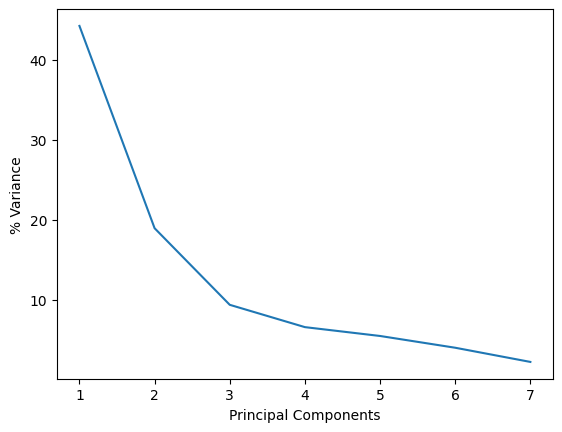

In [42]:
# plotting the variance graph
plt.plot(range(1,8),pcs.explained_variance_ratio_*100)
plt.xlabel('Principal Components')
plt.ylabel('% Variance')
plt.show()


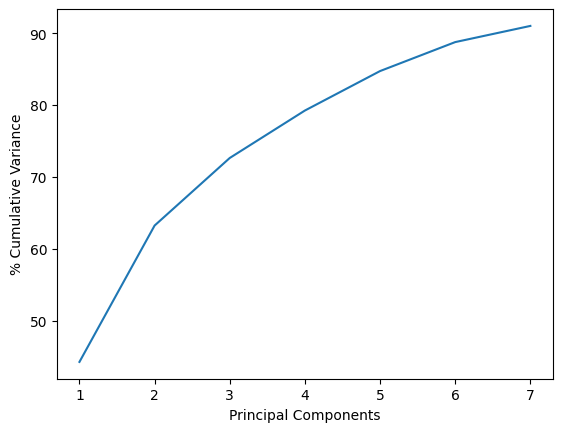

In [43]:
# Cumulative Variance
cum_var = []
total = 0
for variance in pcs.explained_variance_ratio_:
  total += variance
  cum_var.append(round(total*100,2))

# Cumulative variance plot
plt.plot(range(1,8),cum_var)
plt.xlabel('Principal Components')
plt.ylabel('% Cumulative Variance')
plt.show()

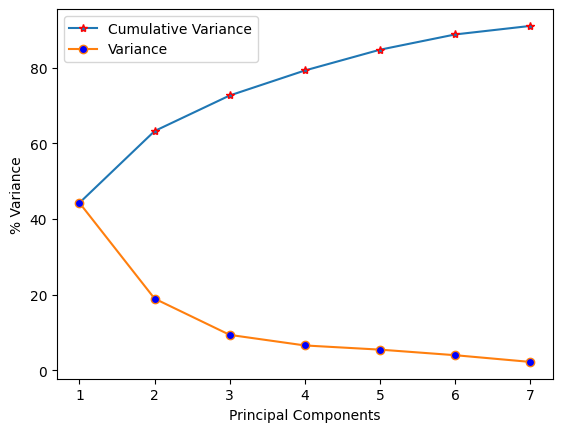

In [44]:
# Combined tradeoff  graph
plt.plot(range(1,8), cum_var, marker = '*', markeredgecolor = 'r',label = 'Cumulative Variance')
plt.plot(range(1,8),pcs.explained_variance_ratio_*100, marker = 'o', markerfacecolor = 'b',label = 'Variance')
plt.xlabel('Principal Components')
plt.ylabel('% Variance')
plt.legend()
plt.show()